# Capstone 1: The Fight Against Malaria
### Machine Learning

Here I will be attempting to fit a regression model to the data using the features to predict the point prevalence as an indicator of the impact of malaria in an area.

In [138]:
# Import Packages
import pandas as pd #for building dataframes from CSV files
import glob, os #for reading file names
import seaborn as sns #for fancy charts
import numpy as np #for np.nan
from scipy import stats #for statistical analysis
from scipy.stats import norm #for statistical analysis
from datetime import datetime #for time-series plots
import statsmodels #for integration with pandas and analysis
import matplotlib.pyplot as plt 
%matplotlib inline  
sns.set_context('poster')
plt.style.use('ggplot')
from sklearn.model_selection import train_test_split

In [139]:
# import the data
df_main = pd.read_csv('data/df_main.csv')
# df_main = df_main[df_main['reported_cases'] > 0]

In [140]:
df_main.columns

Index(['Unnamed: 0', 'year', 'country_code', 'reported_cases', 'region_x',
       'reported_deaths', 'region_y', 'rainfall', 'temperature', 'population',
       'country_name_x', 'percent_agg', 'percent_urb', 'country_name_y',
       'gdp_per_cap', 'country_name', 'pop_density', 'incidence'],
      dtype='object')

In [141]:
# What we are working with
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1075 entries, 0 to 1074
Data columns (total 18 columns):
Unnamed: 0         1075 non-null int64
year               1075 non-null int64
country_code       1075 non-null object
reported_cases     1075 non-null float64
region_x           1075 non-null object
reported_deaths    1075 non-null float64
region_y           1075 non-null object
rainfall           1075 non-null float64
temperature        1075 non-null float64
population         1075 non-null float64
country_name_x     1075 non-null object
percent_agg        1075 non-null float64
percent_urb        1075 non-null float64
country_name_y     1075 non-null object
gdp_per_cap        1075 non-null float64
country_name       1075 non-null object
pop_density        1075 non-null float64
incidence          1075 non-null float64
dtypes: float64(10), int64(2), object(6)
memory usage: 151.2+ KB


In [142]:
df_main.drop(['region_x', 'reported_cases', 'reported_deaths', 'population', 'country_name'], axis=1, inplace=True)

In [143]:
df_categories = pd.get_dummies(df_main, drop_first=True);

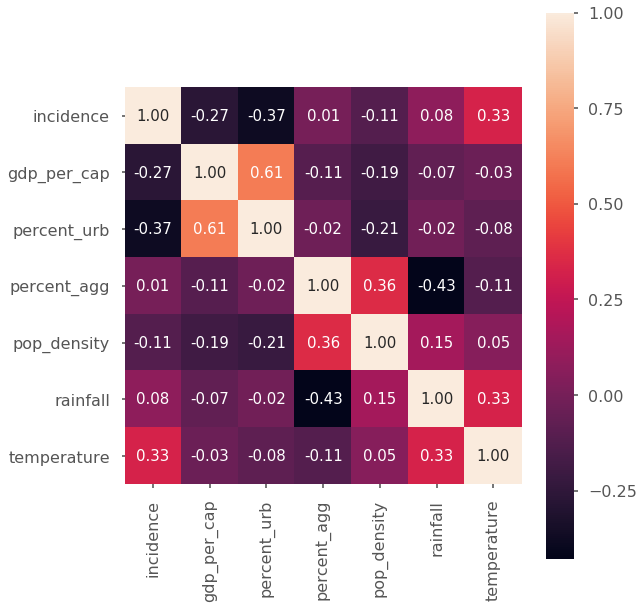

In [144]:
cols = ['incidence', 'gdp_per_cap', 'percent_urb', 'percent_agg', 'pop_density', 'rainfall', 'temperature' ]
f, ax = plt.subplots(figsize=(9,9))
cm = np.corrcoef(df_categories[cols].values.T)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=cols,
                 xticklabels=cols,
                 ax=ax)


plt.tight_layout()
plt.show()

## Making the test sets

In [145]:
# Round 1
train_set_1 = df_categories[(df_categories['year'] >= 2000) & (df_categories['year'] <= 2009)]
test_set_1 = df_categories[(df_categories['year'] == 2010)]

y_train_1 = train_set_1['incidence']
X_train_1 = train_set_1.drop(['incidence', 'year'], axis=1)

y_test_1 = test_set_1['incidence']
X_test_1 = test_set_1.drop(['incidence', 'year'], axis=1)

# Round 2
train_set_2 = df_categories[(df_main['year'] >= 2000) & (df_categories['year'] <= 2010)]
test_set_2 =df_categories[(df_categories['year'] == 2011)]

y_train_2 = train_set_2['incidence']
X_train_2 = train_set_2.drop(['incidence', 'year'], axis=1)

y_test_2 = test_set_2['incidence']
X_test_2 = test_set_2.drop(['incidence', 'year'], axis=1)

# Round 3
train_set_3 = df_categories[(df_categories['year'] >= 2000) & (df_categories['year'] <= 2011)]
test_set_3 = df_categories[(df_categories['year'] == 2012)]

y_train_3 = train_set_3['incidence']
X_train_3 = train_set_3.drop(['incidence', 'year'], axis=1)

y_test_3 = test_set_3['incidence']
X_test_3 = test_set_3.drop(['incidence', 'year'], axis=1)

# Round 4
train_set_4 = df_categories[(df_categories['year'] >= 2000) & (df_categories['year'] <= 2002)]
test_set_4 = df_categories[(df_categories['year'] == 2013)]

y_train_4 = train_set_4['incidence']
X_train_4 = train_set_4.drop(['incidence', 'year'], axis=1)

y_test_4 = test_set_4['incidence']
X_test_4 = test_set_4.drop(['incidence', 'year'], axis=1)

# Round 5
train_set_5 = df_categories[(df_categories['year'] >= 2000) & (df_categories['year'] <= 2013)]
test_set_5 = df_categories[(df_categories['year'] == 2014)]

y_train_5 = train_set_5['incidence']
X_train_5 = train_set_5.drop(['incidence', 'year'], axis=1)

y_test_5 = test_set_5['incidence']
X_test_5 = test_set_5.drop(['incidence', 'year'], axis=1)

In [146]:
X_train_1.head()

,Unnamed: 0,rainfall,temperature,percent_agg,percent_urb,gdp_per_cap,pop_density,country_code_AGO,country_code_ARG,country_code_ARM,...,country_name_y_Timor-Leste,country_name_y_Togo,country_name_y_Turkey,country_name_y_Turkmenistan,country_name_y_Uganda,country_name_y_Uzbekistan,country_name_y_Vanuatu,country_name_y_Vietnam,country_name_y_Zambia,country_name_y_Zimbabwe
3,11,13.724793,16.508073,74.223821,47.048,1704.514750,10.1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6,15,68.229933,7.182552,36.177867,52.625,3174.949001,62.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,19,110.991733,24.940925,41.458910,53.557,4293.322822,258.9,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,25,16.117992,13.405368,62.858486,36.526,654.283837,63.2,0,0,0,...,0,0,0,0,0,1,0,0,0,0
16,28,13.760926,13.401376,64.233662,37.429,558.221144,58.4,0,0,0,...,0,0,0,0,0,1,0,0,0,0


# Testing Models

In [147]:
### Round 1 Multi Regression

What, Why, How, Pros, Cons

In [148]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the regressor: reg
reg = LinearRegression()

# Fit the model to the data
reg.fit(X_train_1, y_train_1)

# Compute predictions over the prediction space: y_pred
y_pred_1 = reg.predict(X_test_1)

# Print R^2 
reg_score_1 = reg.score(X_test_1, y_test_1)
print('Score:', reg_score_1)


Score: 0.83599214764


In [149]:
reg.get_params
print('Slope:', reg.coef_[0])
print('Intercept:', reg.intercept_)

Slope: -0.242270264343
Intercept: 48655.9709054


def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)
    return None

lin_regplot(X_test_1, y_test_1, reg)
plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Price in $1000s [MEDV] (standardized)')
plt.show()

In [150]:
# Round 2

# Fit the model to the data
reg.fit(X_train_2, y_train_2)

# Compute predictions over the prediction space: y_pred
y_pred_2 = reg.predict(X_test_2)

# Print R^2 
reg_score_2 = reg.score(X_test_2, y_test_2)
print('Score:', reg_score_2)


Score: 0.827566473348


In [151]:
# Round 3

# Fit the model to the data
reg.fit(X_train_3, y_train_3)

# Compute predictions over the prediction space: y_pred
y_pred_3 = reg.predict(X_test_3)

# Print R^2 
reg_score_3 = reg.score(X_test_3, y_test_3)
print('Score:', reg_score_3)

Score: 0.847184406743


In [152]:
# Round 4

# Fit the model to the data
reg.fit(X_train_4, y_train_4)

# Compute predictions over the prediction space: y_pred
y_pred_4 = reg.predict(X_test_4)

# Print R^2 
reg_score_4 = reg.score(X_test_4, y_test_4)
print('Score:', reg_score_4)

Score: 0.15428637407


In [153]:
# Round 5

# Fit the model to the data
reg.fit(X_train_5, y_train_5)

# Compute predictions over the prediction space: y_pred
y_pred_5 = reg.predict(X_test_5)

# Print R^2 
reg_score_5 = reg.score(X_test_5, y_test_5)
print('Score:', reg_score_5)

Score: 0.834622331808


In [154]:
reg_scores = [reg_score_1, reg_score_2, reg_score_3, reg_score_4, reg_score_5]
avg_reg_score = sum(reg_scores) / len(reg_scores)
print('Average score:', avg_reg_score)

Average score: 0.699930346722


Major Detractor here is the result from round 4 which is trying to predict the results for 2013.

In [155]:
# Delta / Error from actual

In [156]:
delta_reg_1 = y_pred_1 - y_test_1
delta_reg_2 = y_pred_2 - y_test_2
delta_reg_3 = y_pred_3 - y_test_3
delta_reg_4 = y_pred_4 - y_test_4
delta_reg_5 = y_pred_5 - y_test_5

In [157]:
delta_reg_1 = delta_reg_1.reset_index(drop=True)
delta_reg_2 = delta_reg_2.reset_index(drop=True)
delta_reg_3 = delta_reg_3.reset_index(drop=True)
delta_reg_4 = delta_reg_4.reset_index(drop=True)
delta_reg_5 = delta_reg_5.reset_index(drop=True)

In [158]:
delta_all = pd.DataFrame({'round_1' : delta_reg_1,
                          'round_2' : delta_reg_2,
                          'round_3' : delta_reg_3,
                          'round_4' : delta_reg_4,
                          'round_5' : delta_reg_5})

delta_all['avg'] = delta_all.mean(axis=1)

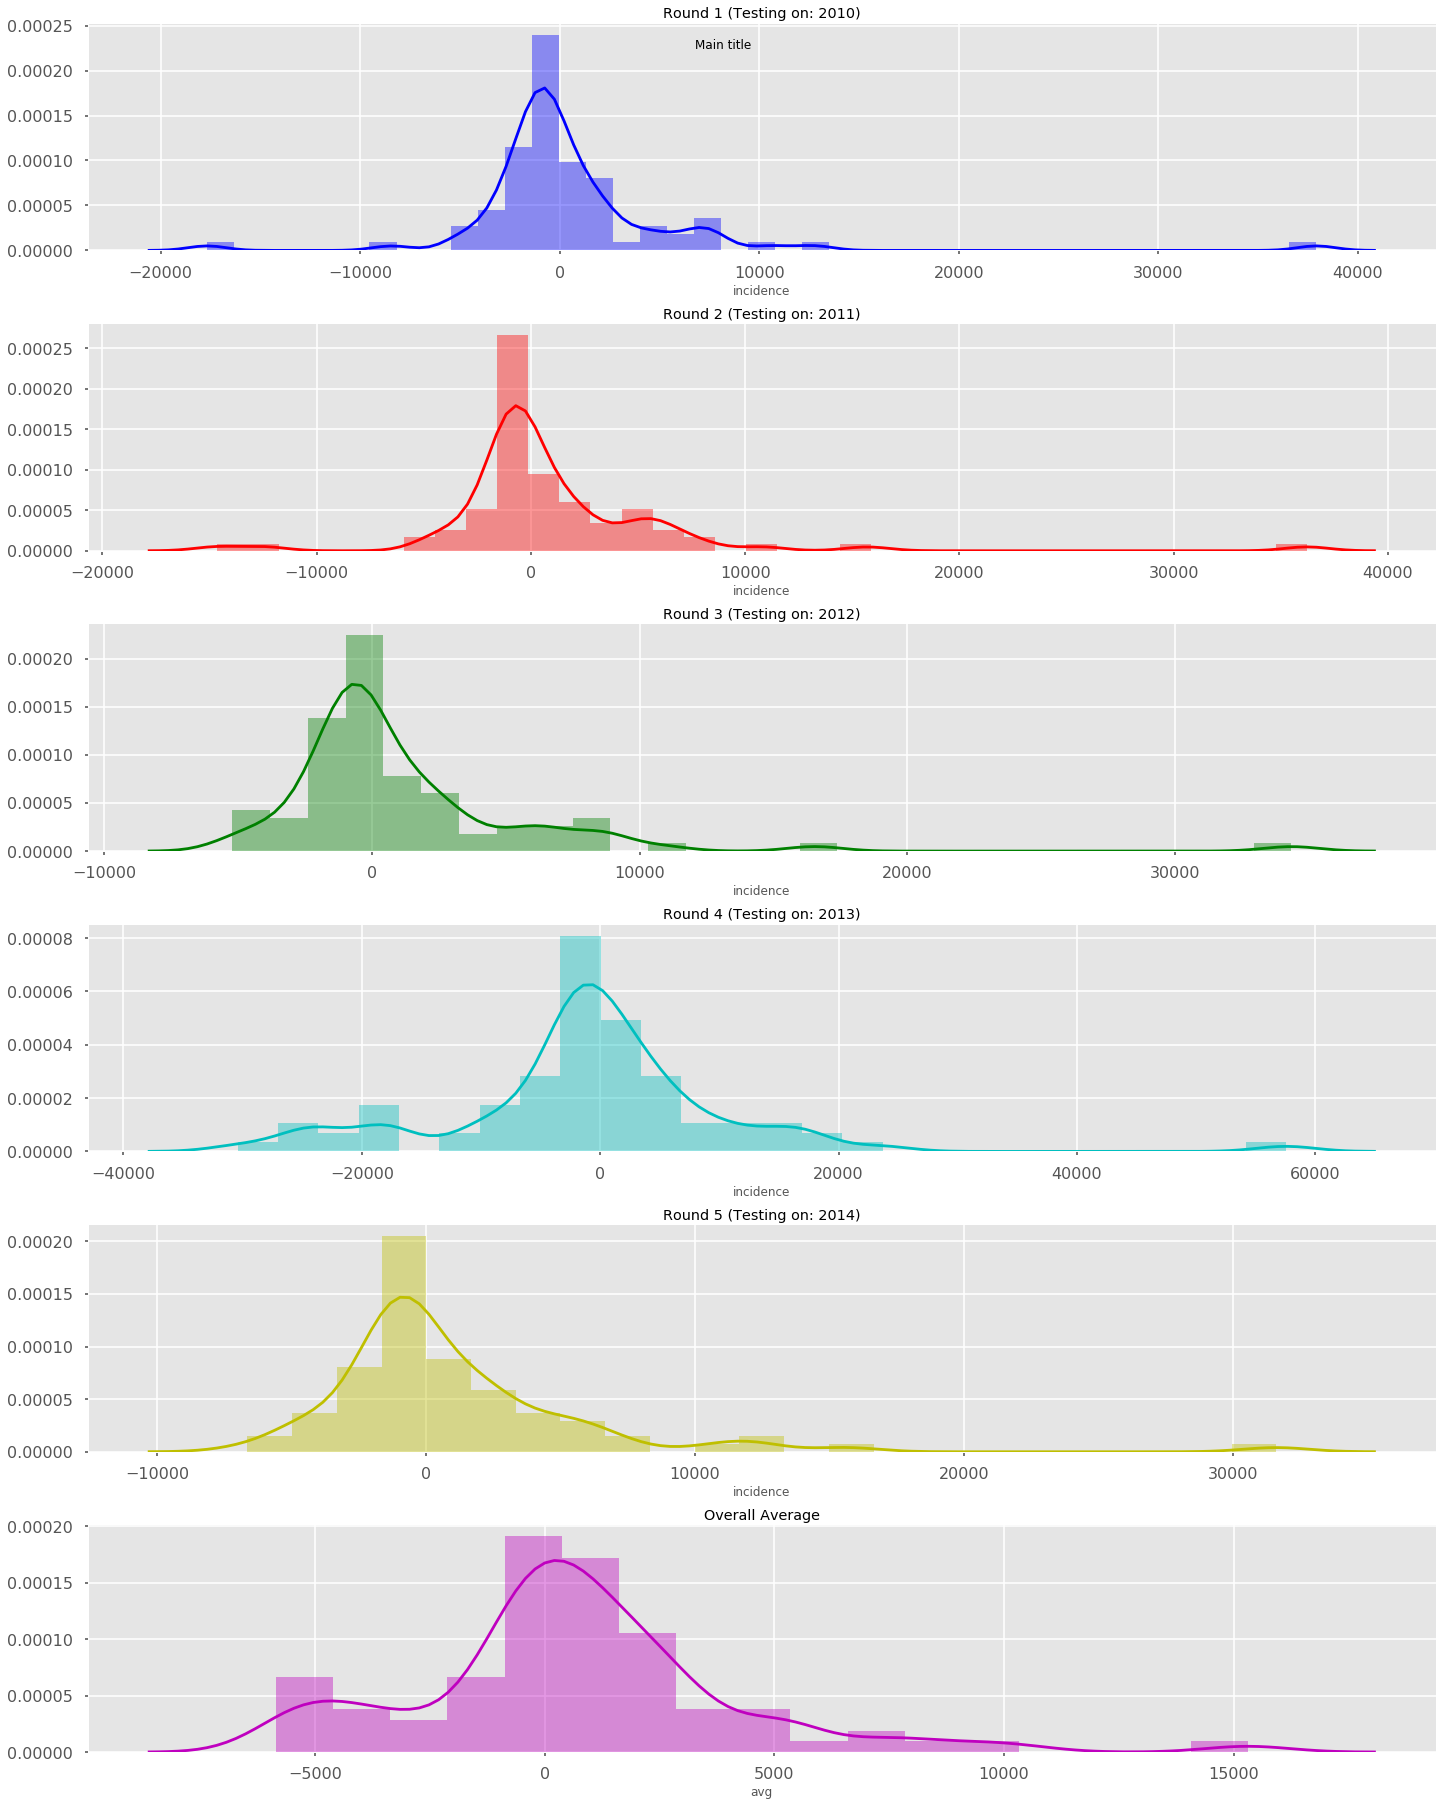

In [159]:
fig,(ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(nrows=6, ncols=1,figsize=(20,25))

plt.suptitle('Main title', verticalalignment='top', horizontalalignment='center')
sns.distplot(delta_reg_1, ax=ax1, color="b")
ax1.set_title("Round 1 (Testing on: 2010)")

sns.distplot(delta_reg_2, ax=ax2, color="r")
ax2.set_title("Round 2 (Testing on: 2011)")

sns.distplot(delta_reg_3, ax=ax3, color="g")
ax3.set_title("Round 3 (Testing on: 2012)")

sns.distplot(delta_reg_4, ax=ax4, color="c")
ax4.set_title("Round 4 (Testing on: 2013)")

sns.distplot(delta_reg_5, ax=ax5, color="y")
ax5.set_title("Round 5 (Testing on: 2014)")

sns.distplot(delta_all['avg'], ax=ax6, color="m")
ax6.set_title("Overall Average")

for ax in (ax1,ax2,ax3,ax4,ax5,ax6):
    sns.despine(ax=ax)

fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

### Bayesian Ridge Regression

In [160]:
from sklearn.linear_model import BayesianRidge
bays = BayesianRidge()

# Round 1 
bays.fit(X_train_1, y_train_1)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)

In [161]:
y_bayes_1 = bays.predict(X_test_1)

In [162]:
# Round 1 score 
bayes_score_1 = bays.score(X_test_1, y_test_1)
print('Score:', bayes_score_1)

Score: 0.844837406552


In [163]:
# Round 2
bays.fit(X_train_2, y_train_2)
y_bayes_2 = bays.predict(X_test_2)
bayes_score_2 = bays.score(X_test_2, y_test_2)
print('Score:', bayes_score_2)

Score: 0.83101957767


In [164]:
# Round 3
bays.fit(X_train_3, y_train_3)
y_bayes_3 = bays.predict(X_test_3)
bayes_score_3 = bays.score(X_test_3, y_test_3)
print('Score:', bayes_score_3)

Score: 0.85313541026


In [165]:
# Round 4
bays.fit(X_train_4, y_train_4)
y_bayes_4 = bays.predict(X_test_4)
bayes_score_4 = bays.score(X_test_4, y_test_4)
print('Score:', bayes_score_4)

Score: 0.014109352725


In [166]:
# Round 5
bays.fit(X_train_5, y_train_5)
y_bayes_5 = bays.predict(X_test_5)
bayes_score_5 = bays.score(X_test_5, y_test_5)
print('Score:', bayes_score_5)

Score: 0.836874442907


In [167]:
bayes_scores = [bayes_score_1,bayes_score_2,bayes_score_3,bayes_score_4,bayes_score_5]
avg_bayes_score = sum(bayes_scores) / len(bayes_scores)
print('Average score:', avg_bayes_score)

Average score: 0.675995238023


In [168]:
delta_bayes_1 = y_bayes_1 - y_test_1
delta_bayes_2 = y_bayes_2 - y_test_2
delta_bayes_3 = y_bayes_3 - y_test_3
delta_bayes_4 = y_bayes_4 - y_test_4
delta_bayes_5 = y_bayes_5 - y_test_5

In [169]:
delta_bayes_1 = delta_bayes_1.reset_index(drop=True)
delta_bayes_2 = delta_bayes_2.reset_index(drop=True)
delta_bayes_3 = delta_bayes_3.reset_index(drop=True)
delta_bayes_4 = delta_bayes_4.reset_index(drop=True)
delta_bayes_5 = delta_bayes_5.reset_index(drop=True)

In [170]:
delta_bayes = pd.DataFrame({'round_1' : delta_bayes_1,
                          'round_2' : delta_bayes_2,
                          'round_3' : delta_bayes_3,
                          'round_4' : delta_bayes_4,
                          'round_5' : delta_bayes_5})

delta_bayes['avg'] = delta_bayes.mean(axis=1)

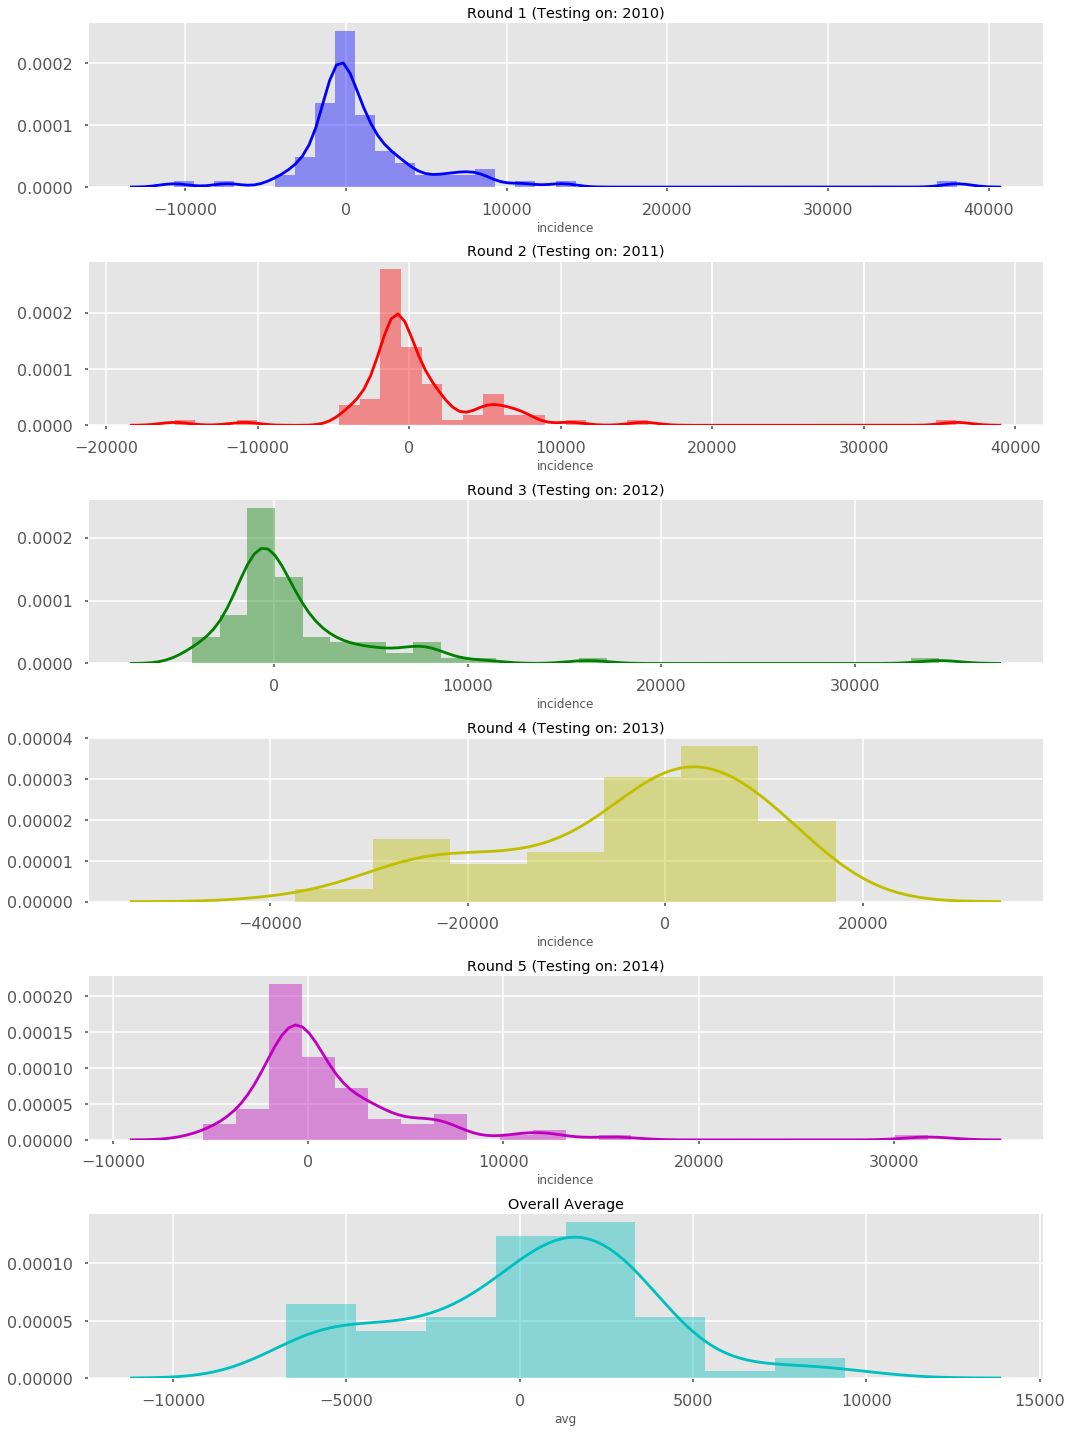

In [171]:
fig,(ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(nrows=6, ncols=1,figsize=(15,20))

sns.distplot(delta_bayes_1, ax=ax1, color="b")
ax1.set_title("Round 1 (Testing on: 2010)")

sns.distplot(delta_bayes_2, ax=ax2, color="r")
ax2.set_title("Round 2 (Testing on: 2011)")

sns.distplot(delta_bayes_3, ax=ax3, color="g")
ax3.set_title("Round 3 (Testing on: 2012)")

sns.distplot(delta_bayes_4, ax=ax4, color="y")
ax4.set_title("Round 4 (Testing on: 2013)")

sns.distplot(delta_bayes_5, ax=ax5, color="m")
ax5.set_title("Round 5 (Testing on: 2014)")

sns.distplot(delta_bayes['avg'], ax=ax6, color="c")
ax6.set_title("Overall Average")

for ax in (ax1,ax2,ax3,ax4,ax5,ax6):
    sns.despine(ax=ax)
fig.tight_layout()

### Random Forrest

In [172]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.grid_search import GridSearchCV
from time import time

In [173]:
forest = RandomForestRegressor(n_estimators=100, 
                               criterion='mse', 
                               oob_score = True,
                               random_state=1,
                               n_jobs=-1)
forest.fit(X_train_1, y_train_1)
y_train_pred_1 = forest.predict(X_train_1)
y_test_pred_1 = forest.predict(X_test_1)

rf_mse_1 = mean_squared_error(y_test_1, y_test_pred_1)
rf_score_1 = r2_score(y_test_1, y_test_pred_1)

print('MSE train:', mean_squared_error(y_train_1, y_train_pred_1),  'test:', rf_mse_1) 

print('R^2 train:', r2_score(y_train_1, y_train_pred_1), 'test:', rf_score_1)


MSE train: 1787502.08617 test: 20861351.3937
R^2 train: 0.991559365858 test: 0.895127442234


### Checking and tuning the model

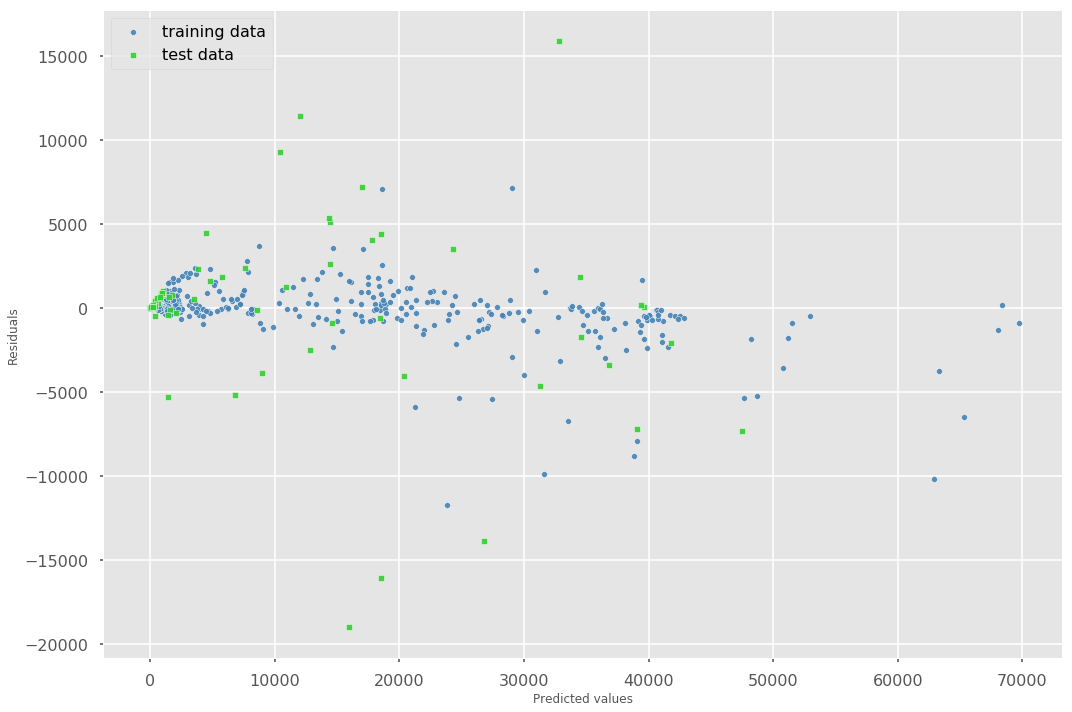

In [174]:
fig, ax = plt.subplots(figsize=(15, 10))

plt.scatter(y_train_pred_1,  
            y_train_pred_1 - y_train_1, 
            c='steelblue',
            edgecolor='white',
            marker='o', 
            s=35,
            alpha=0.9,
            label='training data')

plt.scatter(y_test_pred_1,  
            y_test_pred_1 - y_test_1, 
            c='limegreen',
            edgecolor='white',
            marker='s', 
            s=35,
            alpha=0.9,
            label='test data')

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [175]:
forest_1 = RandomForestRegressor(n_estimators=50, # increaing number of trees
                               criterion='mse',
                               max_features= 'auto',
                               oob_score = True,
                               random_state=1,
                               n_jobs=-1)
forest_1.fit(X_train_1, y_train_1)
y_train_pred_1 = forest_1.predict(X_train_1)
y_test_pred_1 = forest_1.predict(X_test_1)

rf_mse_1 = mean_squared_error(y_test_1, y_test_pred_1)
rf_score_1 = r2_score(y_test_1, y_test_pred_1)

print('MSE train:', mean_squared_error(y_train_1, y_train_pred_1),  'test:', rf_mse_1) 

print('R^2 train:', r2_score(y_train_1, y_train_pred_1), 'test:', rf_score_1)

MSE train: 1878186.72285 test: 18707363.9044
R^2 train: 0.991131150502 test: 0.905955800049


In [176]:
forest_2 = RandomForestRegressor(n_estimators=200, # increaing number of trees
                               criterion='mse',
                               max_features= 'auto',
                               oob_score = True,
                               random_state=1,
                               n_jobs=-1)
forest_2.fit(X_train_1, y_train_1)
y_train_pred_1 = forest_2.predict(X_train_1)
y_test_pred_1 = forest_2.predict(X_test_1)

rf_mse_1 = mean_squared_error(y_test_1, y_test_pred_1)
rf_score_1 = r2_score(y_test_1, y_test_pred_1)

print('MSE train:', mean_squared_error(y_train_1, y_train_pred_1),  'test:', rf_mse_1) 

print('R^2 train:', r2_score(y_train_1, y_train_pred_1), 'test:', rf_score_1)

MSE train: 1739587.80348 test: 20592789.967
R^2 train: 0.991785618422 test: 0.89647753328


In [177]:
forest_3 = RandomForestRegressor(n_estimators=500, # increaing number of trees
                               criterion='mse',
                               max_features= 'auto',
                               oob_score = True,
                               random_state=1,
                               n_jobs=-1)
forest_3.fit(X_train_1, y_train_1)
y_train_pred_1 = forest_3.predict(X_train_1)
y_test_pred_1 = forest_3.predict(X_test_1)

rf_mse_1 = mean_squared_error(y_test_1, y_test_pred_1)
rf_score_1 = r2_score(y_test_1, y_test_pred_1)

print('MSE train:', mean_squared_error(y_train_1, y_train_pred_1),  'test:', rf_mse_1) 

print('R^2 train:', r2_score(y_train_1, y_train_pred_1), 'test:', rf_score_1)

MSE train: 1573272.54986 test: 19959231.0902
R^2 train: 0.992570963636 test: 0.899662511025


### Running the remaining rounds for the RF

In [178]:
# Round 2
forest.fit(X_train_2, y_train_2)
y_train_pred_2 = forest.predict(X_train_2)
y_test_pred_2 = forest.predict(X_test_2)

rf_mse_2 = mean_squared_error(y_test_2, y_test_pred_2)
rf_score_2 = r2_score(y_test_2, y_test_pred_2)

print('MSE train:', mean_squared_error(y_train_2, y_train_pred_2),  'test:', rf_mse_2) 

print('R^2 train:', r2_score(y_train_2, y_train_pred_2), 'test:', rf_score_2)

MSE train: 1198886.11702 test: 27841148.1805
R^2 train: 0.994300397221 test: 0.855780502661


In [179]:
# Round 3
forest.fit(X_train_3, y_train_3)
y_train_pred_3 = forest.predict(X_train_3)
y_test_pred_3 = forest.predict(X_test_3)

rf_mse_3 = mean_squared_error(y_test_3, y_test_pred_3)
rf_score_3 = r2_score(y_test_3, y_test_pred_3)

print('MSE train:', mean_squared_error(y_train_3, y_train_pred_3),  'test:', rf_mse_3) 

print('R^2 train:', r2_score(y_train_3, y_train_pred_3), 'test:', rf_score_3)

MSE train: 1079920.96132 test: 5831708.33441
R^2 train: 0.994824797206 test: 0.968825235438


In [180]:
# Round 4
forest.fit(X_train_4, y_train_4)
y_train_pred_4 = forest.predict(X_train_4)
y_test_pred_4 = forest.predict(X_test_4)

rf_mse_4 = mean_squared_error(y_test_4, y_test_pred_4)
rf_score_4 = r2_score(y_test_4, y_test_pred_4)

print('MSE train:', mean_squared_error(y_train_4, y_train_pred_4),  'test:', rf_mse_4) 

print('R^2 train:', r2_score(y_train_4, y_train_pred_4), 'test:', rf_score_4)

MSE train: 2254694.62193 test: 204610749.568
R^2 train: 0.989505810642 test: -0.167343136684


In [181]:
# Round 5
forest.fit(X_train_5, y_train_5)
y_train_pred_5 = forest.predict(X_train_5)
y_test_pred_5 = forest.predict(X_test_5)

rf_mse_5 = mean_squared_error(y_test_5, y_test_pred_5)
rf_score_5 = r2_score(y_test_5, y_test_pred_5)

print('MSE train:', mean_squared_error(y_train_5, y_train_pred_5),  'test:', rf_mse_5) 

print('R^2 train:', r2_score(y_train_5, y_train_pred_5), 'test:', rf_score_5)

MSE train: 917557.441031 test: 9987358.211
R^2 train: 0.995503595927 test: 0.940663575515


In [182]:
# Average Performance
rf_mse_all = [rf_mse_1,rf_mse_2,rf_mse_3,rf_mse_4,rf_mse_5]
rf_score_all = [rf_score_1,rf_score_2,rf_score_3,rf_score_4,rf_score_5]

avg_mse = sum(rf_mse_all) / len(rf_mse_all)
print('Average MSE:', avg_mse)

avg_rf_score = sum(rf_score_all) / len(rf_score_all)
print('Average score:', avg_rf_score)


Average MSE: 53646039.0767
Average score: 0.699517737591


In [183]:
delta_rf_1 = y_test_pred_1 - y_test_1
delta_rf_2 = y_test_pred_2 - y_test_2
delta_rf_3 = y_test_pred_3 - y_test_3
delta_rf_4 = y_test_pred_4 - y_test_4
delta_rf_5 = y_test_pred_5 - y_test_5

In [184]:
delta_rf_1 = delta_rf_1.reset_index(drop=True)
delta_rf_2 = delta_rf_2.reset_index(drop=True)
delta_rf_3 = delta_rf_3.reset_index(drop=True)
delta_rf_4 = delta_rf_4.reset_index(drop=True)
delta_rf_5 = delta_rf_5.reset_index(drop=True)

In [185]:
delta_rf_all = pd.DataFrame({'round_1' : delta_rf_1,
                          'round_2' : delta_rf_2,
                          'round_3' : delta_rf_3,
                          'round_4' : delta_rf_4,
                          'round_5' : delta_rf_5})

delta_rf_all['avg'] = delta_rf_all.mean(axis=1)

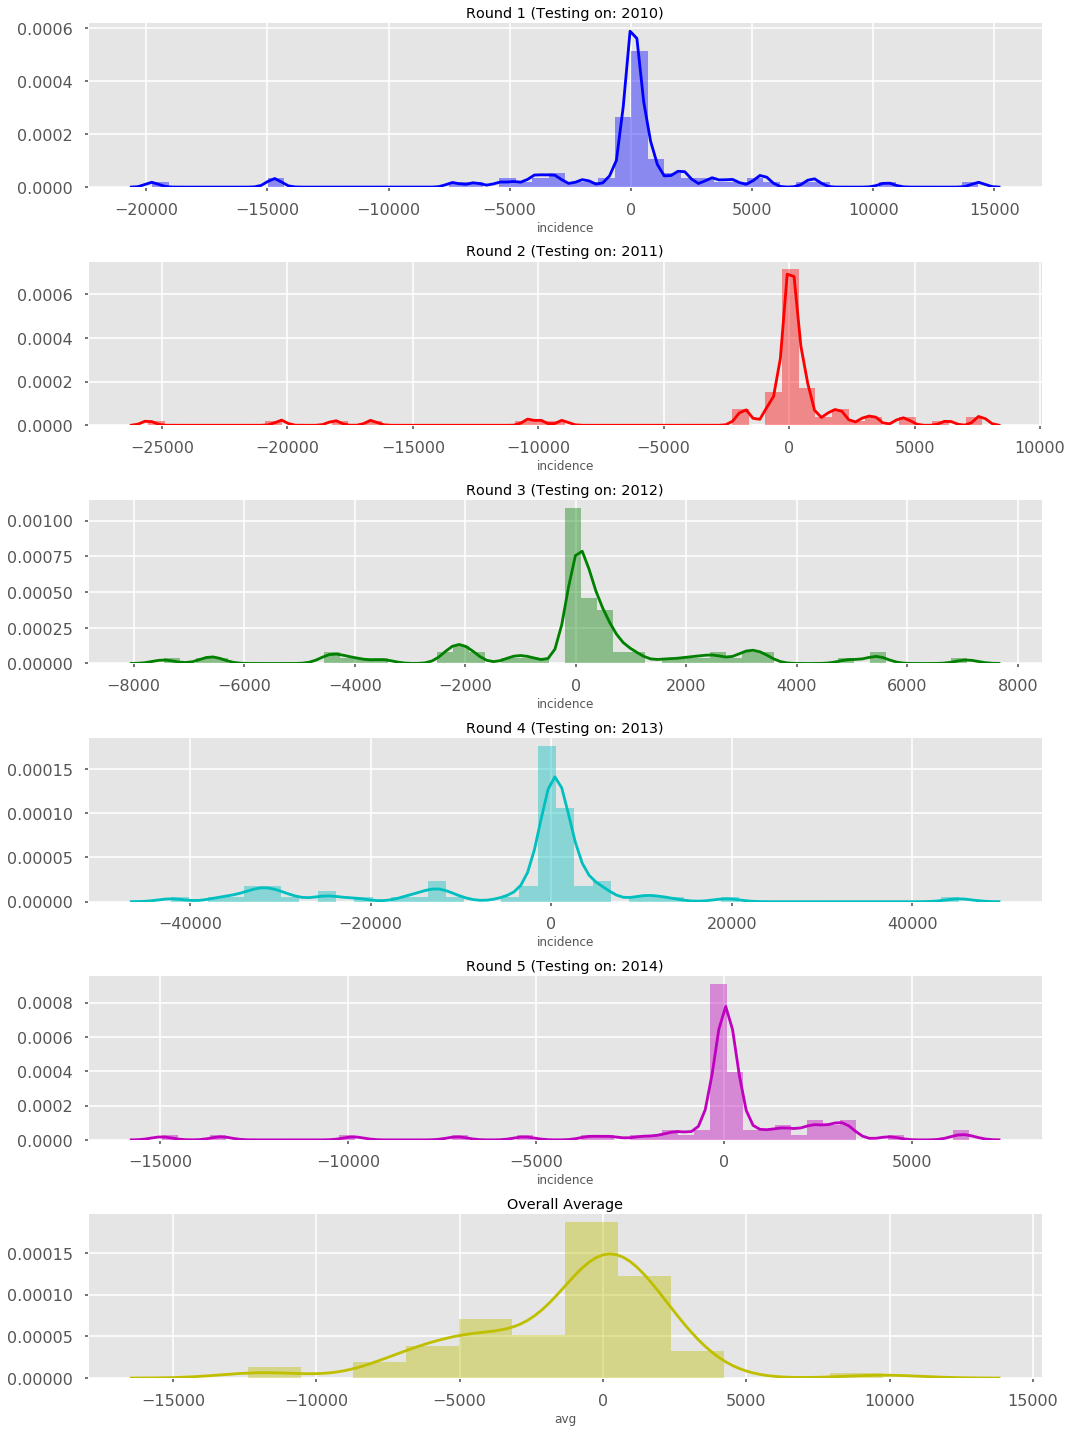

In [186]:
fig,(ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(nrows=6, ncols=1,figsize=(15,20))

sns.distplot(delta_rf_1, ax=ax1, color="b")
ax1.set_title("Round 1 (Testing on: 2010)")

sns.distplot(delta_rf_2, ax=ax2, color="r")
ax2.set_title("Round 2 (Testing on: 2011)")

sns.distplot(delta_rf_3, ax=ax3, color="g")
ax3.set_title("Round 3 (Testing on: 2012)")

sns.distplot(delta_rf_4, ax=ax4, color="c")
ax4.set_title("Round 4 (Testing on: 2013)")

sns.distplot(delta_rf_5, ax=ax5, color="m")
ax5.set_title("Round 5 (Testing on: 2014)")

sns.distplot(delta_rf_all['avg'], ax=ax6, color="y")
ax6.set_title("Overall Average")

for ax in (ax1,ax2,ax3,ax4,ax5,ax6):
    sns.despine(ax=ax)
fig.tight_layout()

### Checking the importance of features

In [187]:
#list(zip(final_beer_df.columns, rf.feature_importances_))
plot_df = pd.DataFrame()
plot_df['col_names'] = X_train_5.columns
plot_df['Predictions'] = forest.feature_importances_
plot_df = plot_df.sort_values(by='Predictions', ascending=False).head(10)
plot_df.sort_values(by='Predictions', ascending=False)

,col_names,Predictions
5,gdp_per_cap,0.242345
2,temperature,0.132318
4,percent_urb,0.082356
3,percent_agg,0.080542
6,pop_density,0.061728
1,rainfall,0.029516
99,region_y_SEAR,0.027739
259,country_name_y_Solomon Islands,0.015992
74,country_code_SLB,0.015236
221,country_name_y_Ghana,0.014119


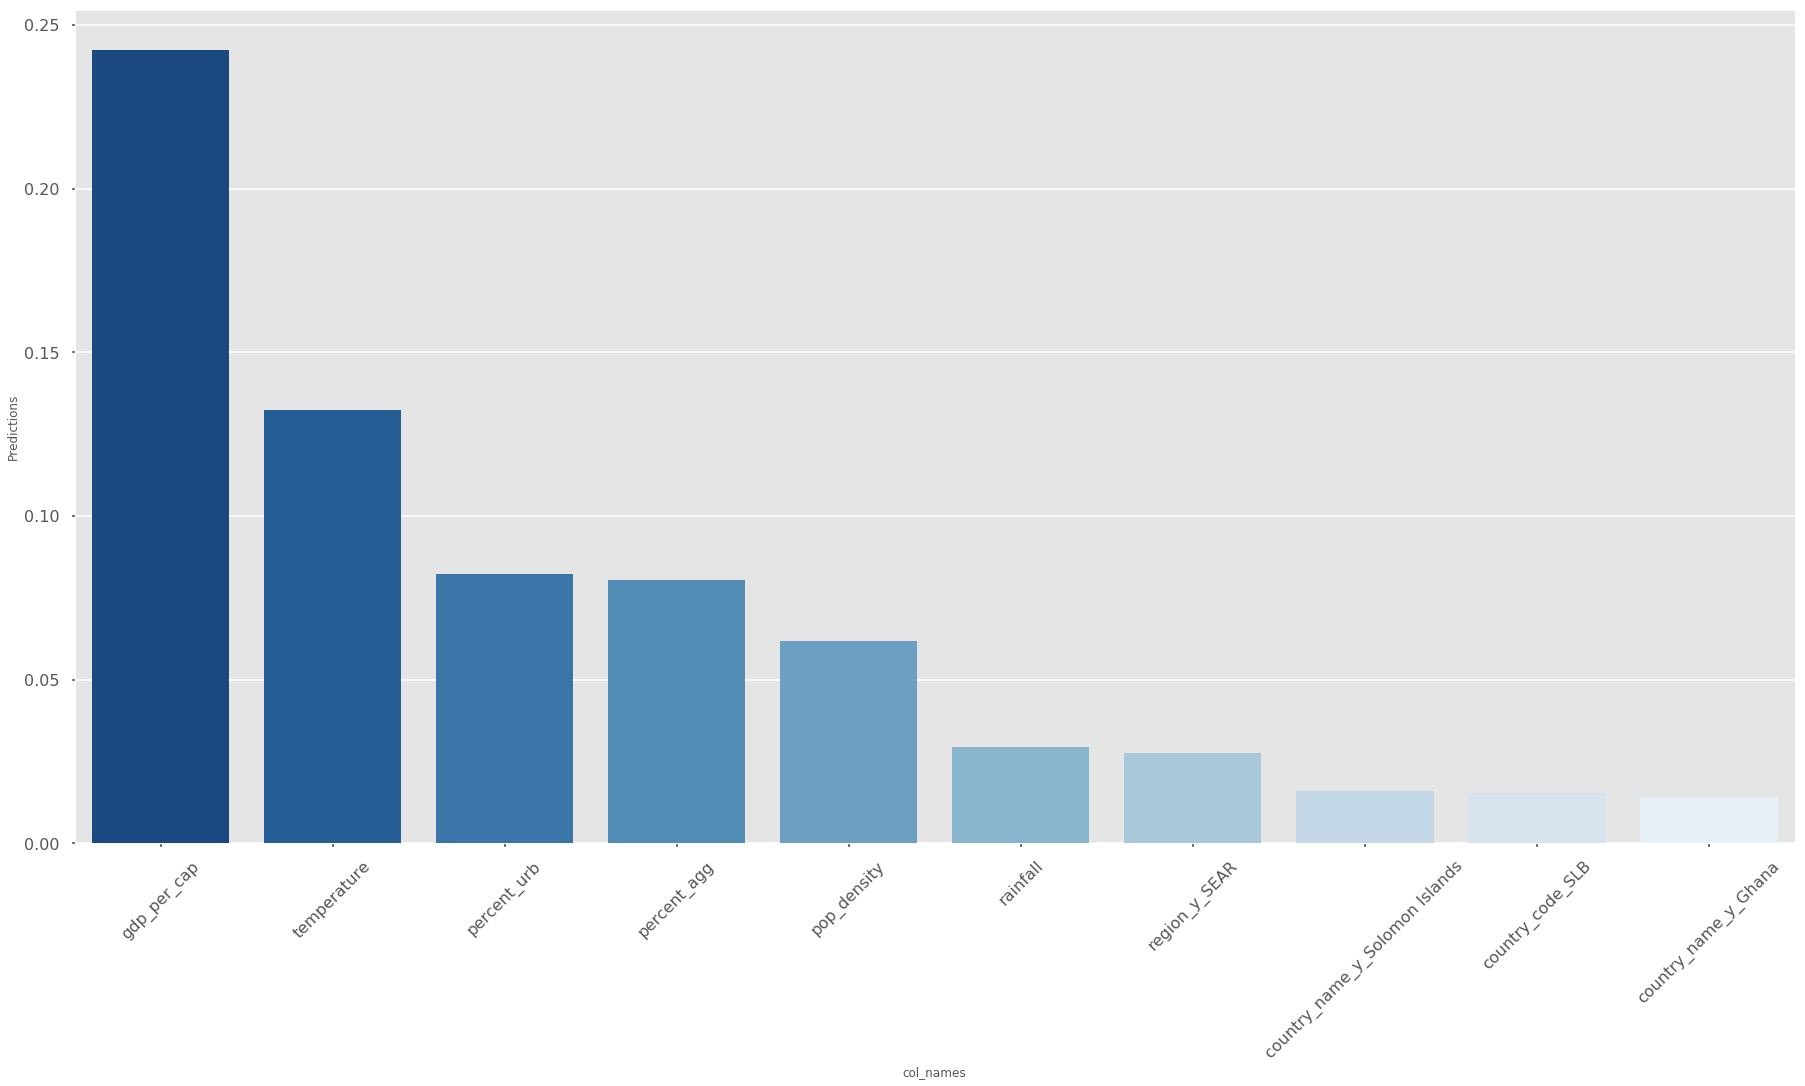

In [188]:
f, axes = plt.subplots(figsize=(25,15))
g3 = sns.barplot(x = "col_names", y = "Predictions", data = plot_df.sort_values(by='Predictions', ascending=False), palette="Blues_r")
g3.set_xticklabels(labels=plot_df.sort_values(by='Predictions', ascending=False)['col_names'],rotation=45)
plt.tight_layout(pad=0.4)

### Gradient Bookting and feature importance

In [189]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(X_train_5, y_train_5)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [190]:
print('Score: ' + str(gb.score(X_test_5, y_test_5)))

Score: 0.878570619953


In [191]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test_5, gb.predict(X_test_5))
print("MSE: %.4f" % mse)

MSE: 20438688.8222


In [192]:
#list(zip(final_beer_df.columns, rf.feature_importances_))
plot_df3 = pd.DataFrame()
plot_df3['col_names'] = X_train_1.columns
plot_df3['Predictions'] = gb.feature_importances_
plot_df_3 = plot_df3.sort_values(by='Predictions', ascending=False).head(25)
plot_df_3.sort_values(by='Predictions', ascending=False)

,col_names,Predictions
4,percent_urb,0.069192
5,gdp_per_cap,0.057043
2,temperature,0.053063
6,pop_density,0.047935
99,region_y_SEAR,0.032418
202,country_name_y_Burkina Faso,0.023729
1,rainfall,0.023684
115,country_name_x_Cambodia,0.019257
97,region_y_EMR,0.018814
20,country_code_CAF,0.018228


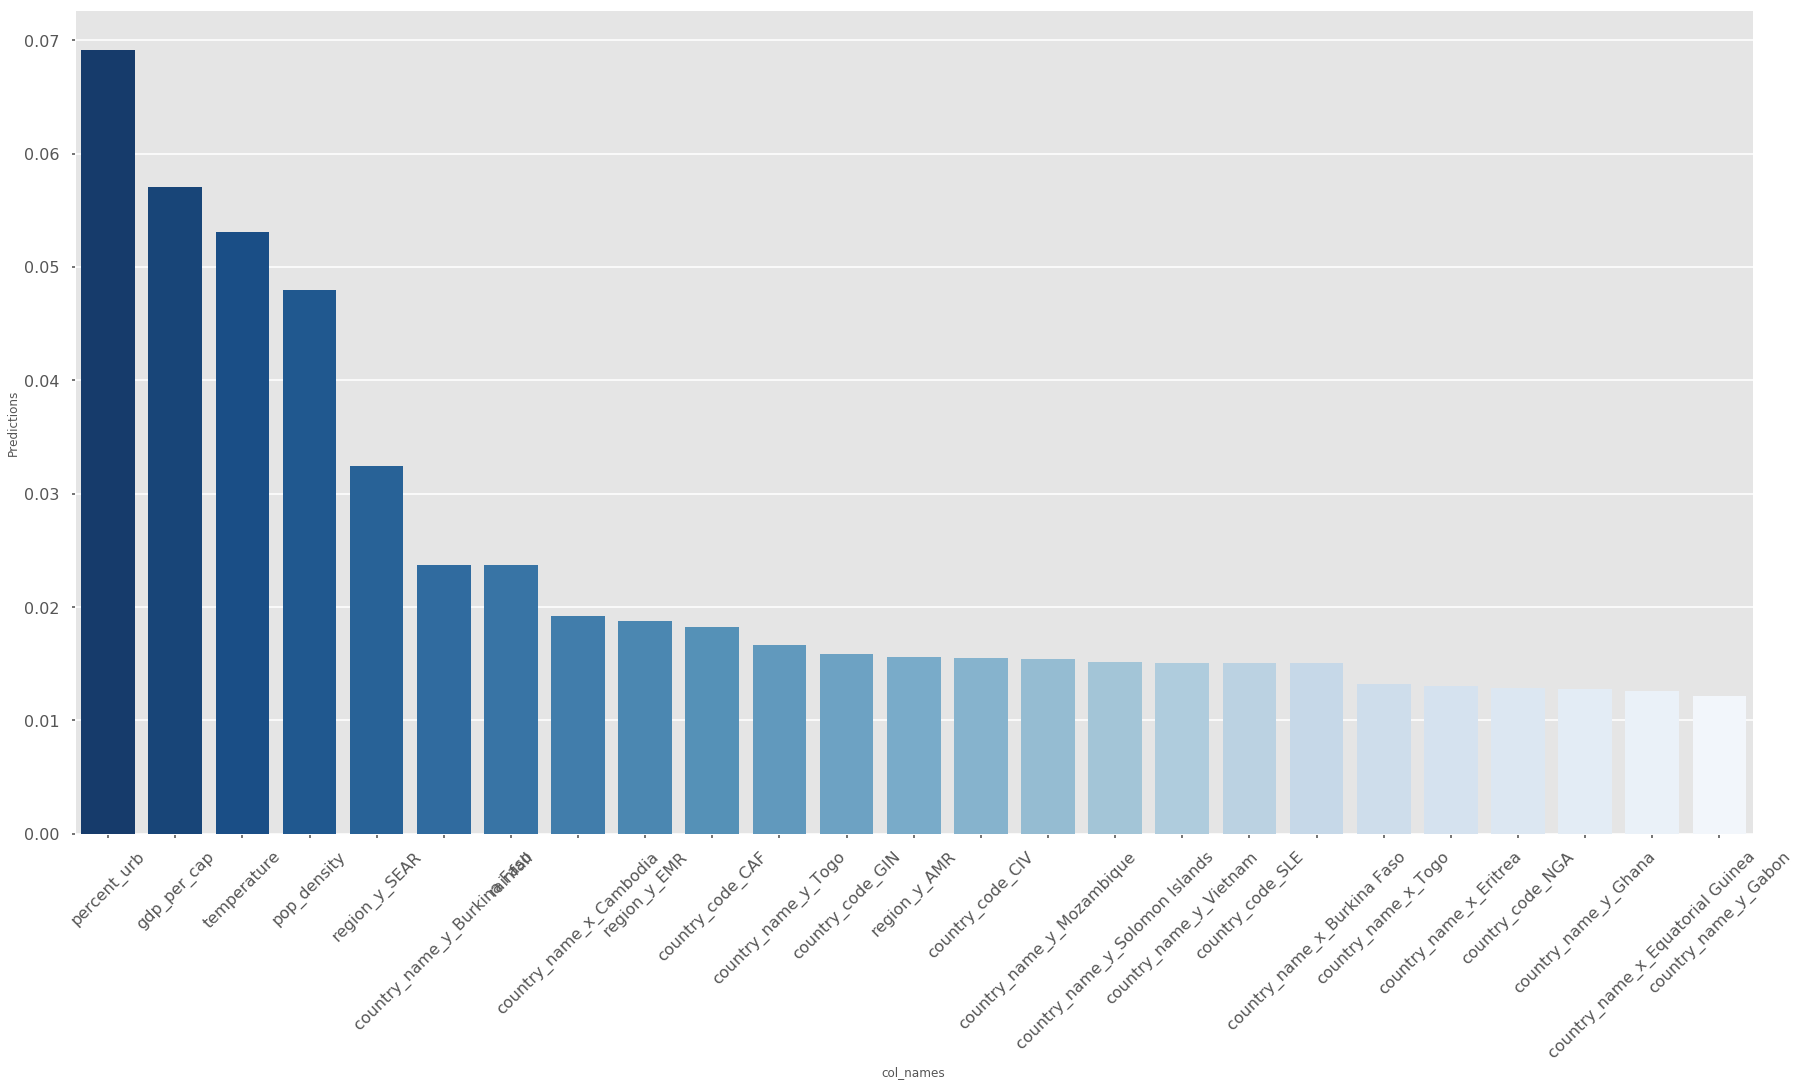

In [193]:
f, axes = plt.subplots(figsize=(25,15))
g3 = sns.barplot(x = "col_names", y = "Predictions", data = plot_df_3.sort_values(by='Predictions', ascending=False), palette="Blues_r")
g3.set_xticklabels(labels=plot_df_3.sort_values(by='Predictions', ascending=False)['col_names'],rotation=45)
plt.tight_layout(pad=0.4)

### OLS

In [194]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
m = ols('incidence ~ rainfall + temperature + percent_agg + percent_urb + gdp_per_cap + pop_density', train_set_1).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:              incidence   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     47.48
Date:                Tue, 23 Jan 2018   Prob (F-statistic):           2.07e-48
Time:                        12:51:19   Log-Likelihood:                -7187.4
No. Observations:                 664   AIC:                         1.439e+04
Df Residuals:                     657   BIC:                         1.442e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    3204.8294   2724.029      1.177      

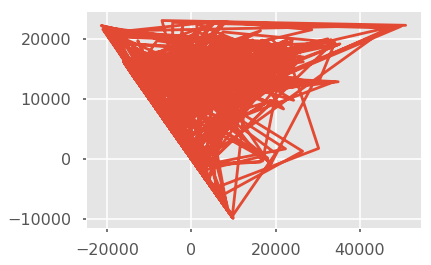

In [195]:
plt.plot(m.resid,m.fittedvalues);

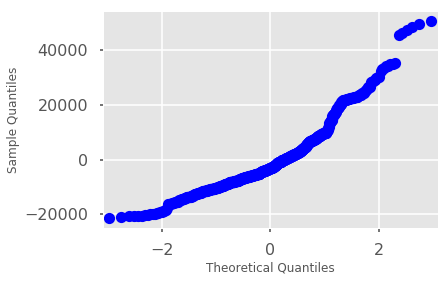

In [196]:
# Residual quantile plot
import statsmodels.api as sm
sm.qqplot(m.resid)
plt.show()

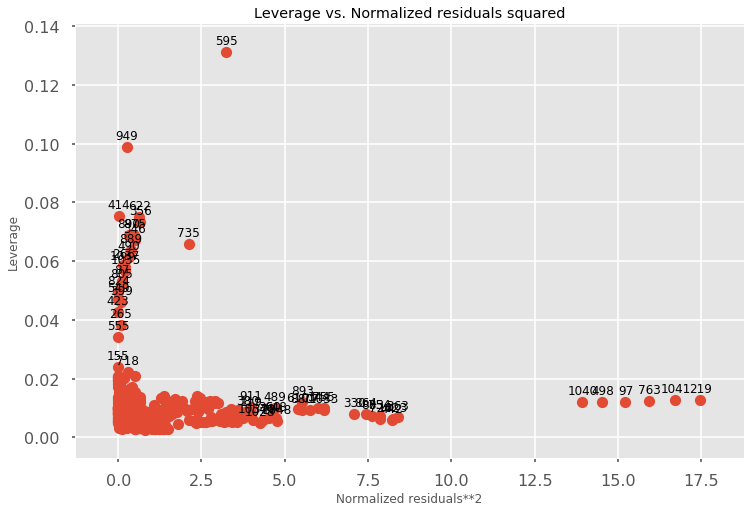

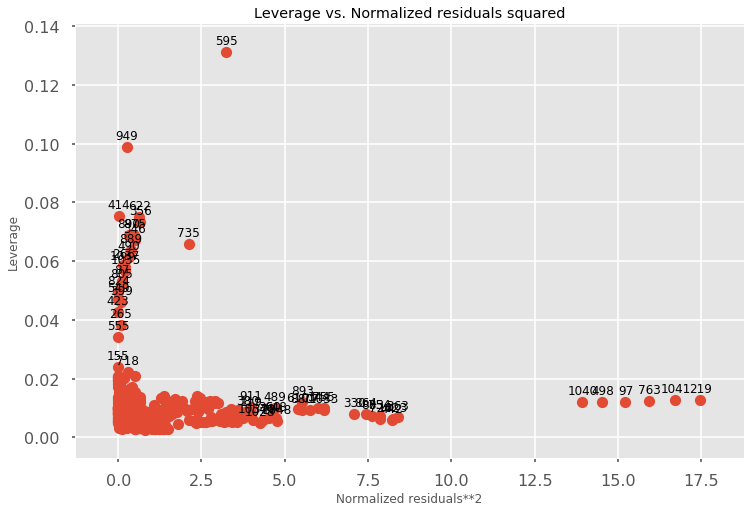

In [197]:
# leverage plot
from statsmodels.graphics.regressionplots import *
fig, ax = plt.subplots(figsize=(12,8))
plot_leverage_resid2(m, ax=ax)

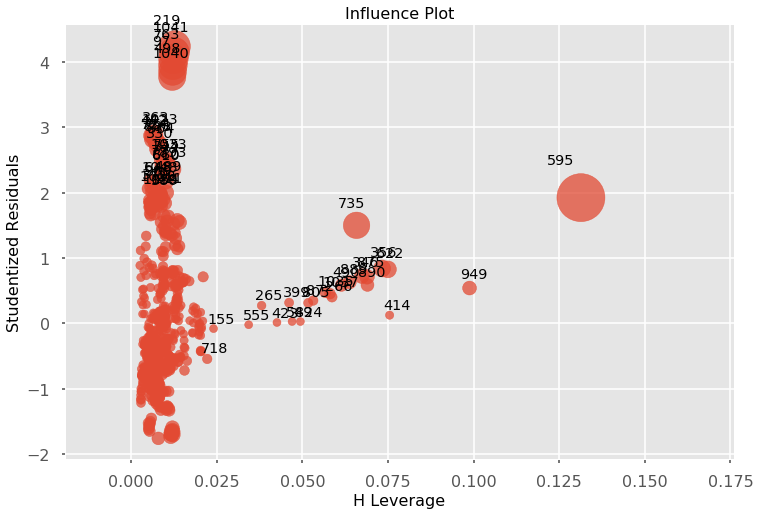

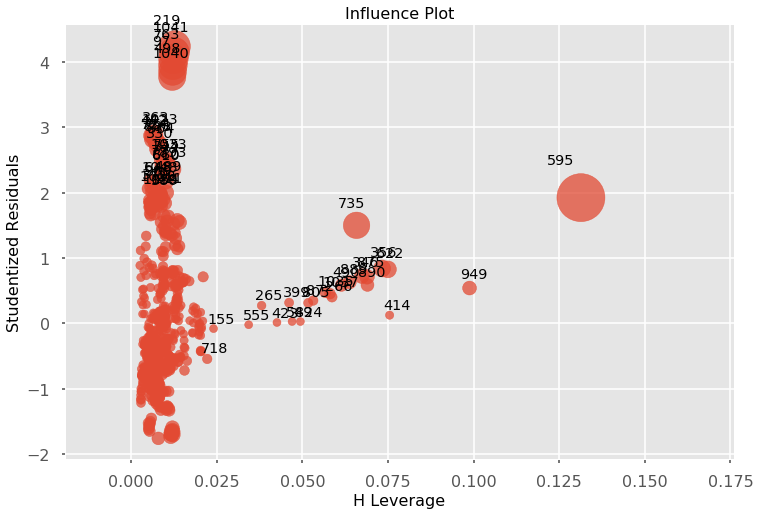

In [198]:
fig, ax = plt.subplots(figsize=(12,8))
influence_plot(m, ax=ax)

### Round 1 RANSAC

Read the article about parameters and refine the model some

In [199]:
from sklearn.linear_model import RANSACRegressor
ransac = RANSACRegressor(LinearRegression(),
max_trials=500,
min_samples=100,
loss='absolute_loss',
residual_threshold=10.0,
random_state=0)
ransac.fit(X_train_1, y_train_1)

RANSACRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
        is_data_valid=None, is_model_valid=None, loss='absolute_loss',
        max_skips=inf, max_trials=500, min_samples=100, random_state=0,
        residual_metric=None, residual_threshold=10.0, stop_n_inliers=inf,
        stop_probability=0.99, stop_score=inf)

In [200]:
y_ransac_1 = reg.predict(X_test_1)

In [201]:
print(ransac.score(X_test_1, y_test_1))

0.511380518124


### Round 1 SGD

In [202]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor()
sgd = sgd.fit(X_train_1, y_train_1)
sgd_pred_1 = sgd.predict(X_test_1)

C:\Users\zalle\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [203]:
sgd.score(X_test_1, y_test_1)

-8.3379798496712698e+23

### Round 1 Elasstic

In [204]:
from sklearn.linear_model import ElasticNet

regr = ElasticNet(random_state=0)
regr.fit(X_train_1, y_train_1)


ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=0, selection='cyclic', tol=0.0001, warm_start=False)

In [205]:
reg_y_1 = regr.predict(X_test_1) 

In [206]:
regr.score(X_test_1, y_test_1)

0.3693790609263724